# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
# from api_keys import weather_api_key

weather_api_key = "6cb990c73e89fb81dab285393417f0a8"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

## Perform API Calls

In [3]:
# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | pinega
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | nobres
Processing Record 5 of Set 1 | cidreira
Processing Record 6 of Set 1 | qorveh
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | osakarovka
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | piacabucu
Processing Record 15 of Set 1 | marcona
City not found. Skipping...
Processing Record 16 of Set 1 | naze
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | korla
Processing Record 20 of Set 1 | dingle
Processing Record 21 of Set 1 | cherskiy
Processing Record 22 of Set 1 | port alf

Processing Record 35 of Set 4 | aripuana
Processing Record 36 of Set 4 | saint-pierre
Processing Record 37 of Set 4 | yerbogachen
Processing Record 38 of Set 4 | beringovskiy
Processing Record 39 of Set 4 | kasulu
Processing Record 40 of Set 4 | nantucket
Processing Record 41 of Set 4 | faanui
Processing Record 42 of Set 4 | cape canaveral
Processing Record 43 of Set 4 | saskylakh
Processing Record 44 of Set 4 | laguna
Processing Record 45 of Set 4 | iquique
Processing Record 46 of Set 4 | foumban
Processing Record 47 of Set 4 | klaksvik
Processing Record 48 of Set 4 | nha trang
Processing Record 49 of Set 4 | swan hill
Processing Record 0 of Set 5 | davila
Processing Record 1 of Set 5 | honiara
Processing Record 2 of Set 5 | nabire
Processing Record 3 of Set 5 | camacha
Processing Record 4 of Set 5 | skelleftea
Processing Record 5 of Set 5 | gorno-chuyskiy
City not found. Skipping...
Processing Record 6 of Set 5 | alta floresta
Processing Record 7 of Set 5 | esperance
Processing Recor

Processing Record 26 of Set 8 | blagoyevo
Processing Record 27 of Set 8 | boffa
Processing Record 28 of Set 8 | anadyr
Processing Record 29 of Set 8 | amderma
City not found. Skipping...
Processing Record 30 of Set 8 | los alamos
Processing Record 31 of Set 8 | majene
Processing Record 32 of Set 8 | arvika
Processing Record 33 of Set 8 | revelstoke
Processing Record 34 of Set 8 | banyo
Processing Record 35 of Set 8 | balvi
Processing Record 36 of Set 8 | dalen
Processing Record 37 of Set 8 | duz
City not found. Skipping...
Processing Record 38 of Set 8 | haines junction
Processing Record 39 of Set 8 | moctezuma
Processing Record 40 of Set 8 | leningradskiy
Processing Record 41 of Set 8 | latung
Processing Record 42 of Set 8 | buchanan
Processing Record 43 of Set 8 | republic
Processing Record 44 of Set 8 | brownsville
Processing Record 45 of Set 8 | engerwitzdorf
Processing Record 46 of Set 8 | inhambane
Processing Record 47 of Set 8 | makasar
Processing Record 48 of Set 8 | necochea
P

Processing Record 15 of Set 12 | waipawa
Processing Record 16 of Set 12 | sedelnikovo
City not found. Skipping...
Processing Record 17 of Set 12 | aswan
Processing Record 18 of Set 12 | lingao
Processing Record 19 of Set 12 | port said
Processing Record 20 of Set 12 | siparia
Processing Record 21 of Set 12 | slantsy
Processing Record 22 of Set 12 | elizabeth city
Processing Record 23 of Set 12 | antalaha
Processing Record 24 of Set 12 | ous
Processing Record 25 of Set 12 | kahului
Processing Record 26 of Set 12 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 27 of Set 12 | stephenville
Processing Record 28 of Set 12 | jumla
Processing Record 29 of Set 12 | kavaratti
Processing Record 30 of Set 12 | domoni
Processing Record 31 of Set 12 | sande
Processing Record 32 of Set 12 | lixourion
Processing Record 33 of Set 12 | pokrovsk-uralskiy
City not found. Skipping...
Processing Record 34 of Set 12 | del rio
Processing Record 35 of Set 12 | saint anthony
Processing Reco

In [6]:
len(city_data)

565

In [7]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Show Record Count
city_data_pd.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [8]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.8794,147.3294,53.60,71,51,9.22,AU,1616867612
1,pinega,64.7001,43.3936,24.40,95,9,5.46,RU,1616868124
2,kodiak,57.7900,-152.4072,30.20,43,1,11.50,US,1616867808
3,nobres,-14.7203,-56.3275,90.34,46,27,3.36,BR,1616868125
4,cidreira,-30.1811,-50.2056,77.65,76,98,6.46,BR,1616867837


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,19.514770,19.063856,58.007080,69.736283,51.994690,8.457133,1.616868e+09
std,33.666804,90.215959,27.116715,22.932127,38.561478,6.692601,1.680028e+02
min,-54.800000,-175.200000,-25.600000,1.000000,0.000000,0.130000,1.616867e+09
25%,-9.665800,-60.633300,42.800000,57.000000,13.000000,3.940000,1.616868e+09
50%,22.788600,21.024700,66.000000,74.000000,55.000000,6.910000,1.616868e+09
75%,49.416900,100.451700,78.800000,88.000000,90.000000,11.320000,1.616868e+09
max,78.218600,179.316700,109.400000,100.000000,100.000000,50.640000,1.616868e+09


In [10]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
dirty_city_data

Int64Index([], dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.8794,147.3294,53.60,71,51,9.22,AU,1616867612
1,pinega,64.7001,43.3936,24.40,95,9,5.46,RU,1616868124
2,kodiak,57.7900,-152.4072,30.20,43,1,11.50,US,1616867808
3,nobres,-14.7203,-56.3275,90.34,46,27,3.36,BR,1616868125
4,cidreira,-30.1811,-50.2056,77.65,76,98,6.46,BR,1616867837


In [12]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/cities.csv'

## Latitude vs. Temperature Plot

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig1.png'

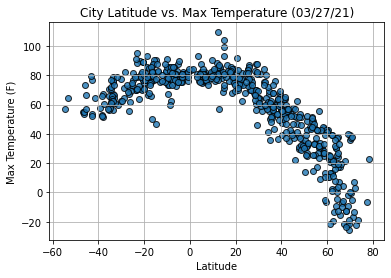

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

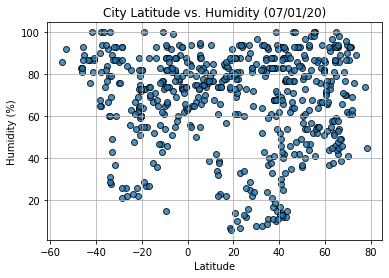

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

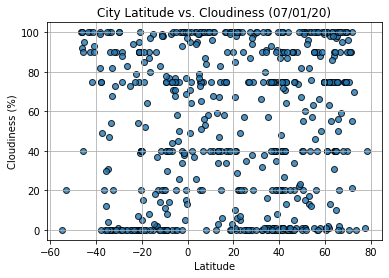

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

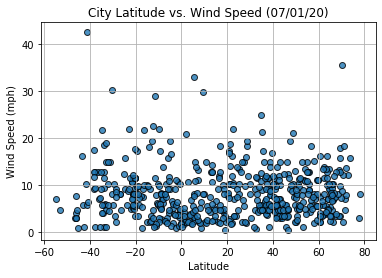

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [16]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

###  Max Temp vs. Latitude Linear Regression

The r-value is: 0.4385222622143718


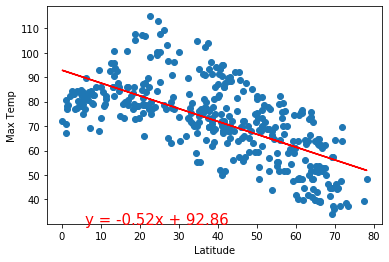

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-value is: 0.6199397603726745


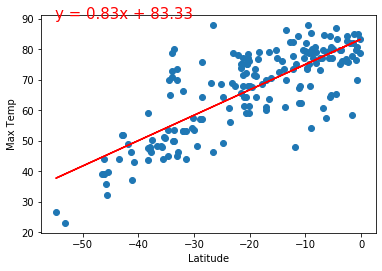

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

The high r value indicates a strong positive correlation between latitude and max temperature. R values ~ 0.5 indicate that there is a moderate positive correlation. 

### Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0016116777278289516


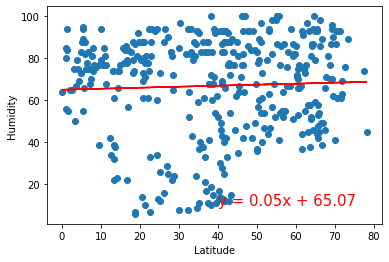

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-value is: 0.0038626940821578


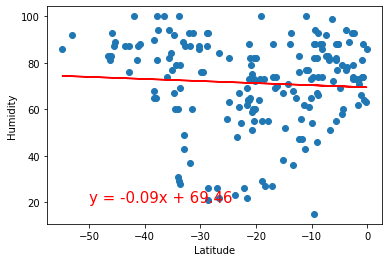

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

The low r values indicate a weak to no relationship between humidity and latitude.

### Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 2.5990039670556435e-05


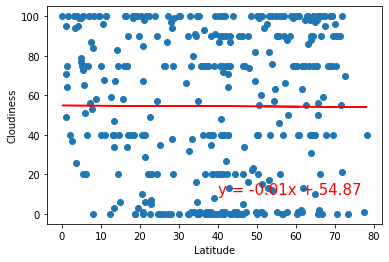

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-value is: 0.009647394310294634


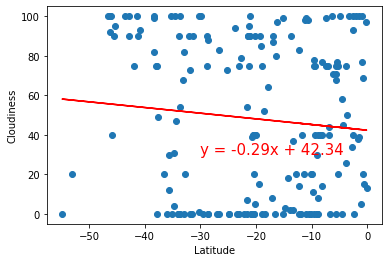

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

The low r values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.005590882726654447


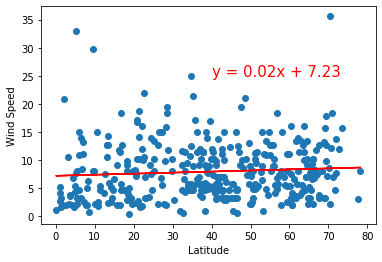

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-value is: 0.015078836518603362


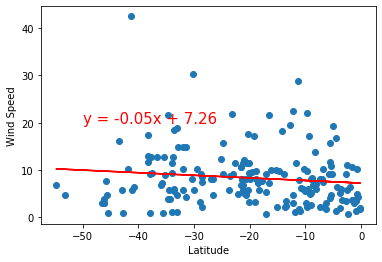

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))

The low r values indicate that there is no real relationship between wind speed and latitude." The difference between the hemispheres doesn't seem to be significant enough to comment upon.